# **Medical Insurance Data Analysis**

## Objectives

* To investigate the influence different variables (bmi, sex, smoking status, age and region) have on medical insurance charges 
* This will be done using ETL and Data Visualisation using: Pandas, Matplotlib, Seaborn, Plotly
* Data was sourced from Kaggle. Link to dataset can be found [here](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance)
## Inputs

* insurance.cvs

## Outputs

* insurance_cleaned.csv

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [63]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis'

# Section 1: ETL

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Section 1: Extract Data 

In [5]:
#Print the first 5 rows of the dataframe to ensure data is loaded correctly
df=pd.read_csv('./Data/Raw_data/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Display summary information about the dataframe
#pd.set_option('display.max_columns', None)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [7]:
#print column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Knowing the data types within the dataframe is important as it can affect what operations can be performed using them

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Statistical Overiew of Numerical Data**

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---

# Transform

Section 2: Transforming the Data
This will involved
* Identifying null values and removing, or filling them
* Identifying duplicated entries and removing them
* Outlier detection
* Encoding categorical data storing the result in a separate column
* Equal Frequency to bin age categories together???? This may need to be done later
* Creating a new bmi category


**Cleaning Data: Null & Duplicate Values**

In [10]:
#Check for missing values per column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#Check for duplicate rows in the dataframe
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
#remove duplicate rows if any
df=df.drop_duplicates()

In [13]:
#check duplicate removal
df.duplicated().sum()

0

**Encoding Categorical Data**

In [14]:
gender_count=df['sex'].value_counts()

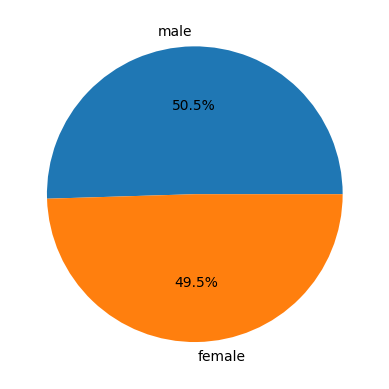

In [15]:
gender_count=df.value_counts('sex', normalize=True)
plt.pie(x=gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.show()

The distribution of the genders is almost equal which means comparisons of insurance charges by sex or that include sex are meaningful and unbiased.
This balance reduces the risk of skewed results due to overrepresentation of one gender.

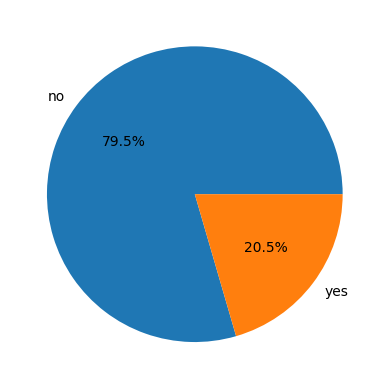

In [16]:
smoker_count=df['smoker'].value_counts()
smoker_count=df.value_counts('smoker', normalize=True)
plt.pie(x=smoker_count, labels=smoker_count.index, autopct='%1.1f%%')
plt.show()

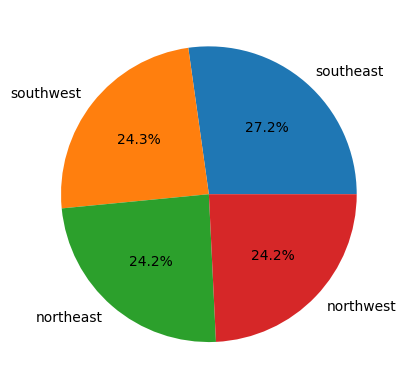

In [17]:
region_count=df['region'].value_counts()
region_count=df.value_counts('region', normalize=True)
plt.pie(x=region_count, labels=region_count.index, autopct='%1.1f%%')
plt.show()

# Encoding #

**OneHotEncoder**

In [18]:
from feature_engine.encoding import OneHotEncoder

In [19]:
# One-hot encode the 'sex' and 'smoker' columns while keeping the original categorical data.
# This allows us to use the encoded columns for modelling without losing the original labels for interpretation or categorical data visualization.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

encoded = ohe.fit_transform(df[['sex','smoker']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['sex', 'smoker']))

df_final = pd.concat([df, encoded_df], axis=1)
df_final.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.0,1.0
1,18.0,male,33.770,1.0,no,southeast,1725.55230,1.0,0.0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,1.0,0.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,1.0,0.0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,1.0,0.0


I had the code to encode the categorical data however I wanted to keep the orignal data without losing it to the binary replacement. With the help of Copilot I was able to achieve this.

**Encoding: Ordinal Encoder**

In [20]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

encoded = oe.fit_transform(df[['region']])
encoded_df = pd.DataFrame(encoded, columns=['region_encoded'], index=df.index)

df_final = df_final.join(encoded_df)
df_final.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_encoded
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.0,1.0,3.0
1,18.0,male,33.770,1.0,no,southeast,1725.55230,1.0,0.0,2.0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,1.0,0.0,2.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,1.0,0.0,1.0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,1.0,0.0,1.0


**Adding a New Bmi Category**

In [21]:
df_final['weight_category'] = pd.cut(
    df_final['bmi'],
    bins=[0, 18.5, 24.9, 29.9,39.9, float('inf')],
    labels=['Underweight', 'Healthy', 'Overweight', 'Obese', 'severely Obese']
)
df_final.head(8)

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_encoded,weight_category
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.0,1.0,3.0,Overweight
1,18.0,male,33.770,1.0,no,southeast,1725.55230,1.0,0.0,2.0,Obese
2,28.0,male,33.000,3.0,no,southeast,4449.46200,1.0,0.0,2.0,Obese
3,33.0,male,22.705,0.0,no,northwest,21984.47061,1.0,0.0,1.0,Healthy
4,32.0,male,28.880,0.0,no,northwest,3866.85520,1.0,0.0,1.0,Overweight
5,31.0,female,25.740,0.0,no,southeast,3756.62160,0.0,0.0,2.0,Overweight
6,46.0,female,33.440,1.0,no,southeast,8240.58960,0.0,0.0,2.0,Obese
7,37.0,female,27.740,3.0,no,northwest,7281.50560,0.0,0.0,1.0,Overweight


NHS website was used to identify which bmi belonged to each weight category the information can be found [here](https://www.nhs.uk/conditions/obesity/)

In [22]:
#move column 'weight_category' to be next to bmi column for better readability

col = df_final.pop('weight_category')
df_final.insert(df_final.columns.get_loc('bmi') + 1, col.name, col)
df_final.head(8)

,age,sex,bmi,weight_category,children,smoker,region,charges,sex_male,smoker_yes,region_encoded
0,19.0,female,27.900,Overweight,0.0,yes,southwest,16884.92400,0.0,1.0,3.0
1,18.0,male,33.770,Obese,1.0,no,southeast,1725.55230,1.0,0.0,2.0
2,28.0,male,33.000,Obese,3.0,no,southeast,4449.46200,1.0,0.0,2.0
3,33.0,male,22.705,Healthy,0.0,no,northwest,21984.47061,1.0,0.0,1.0
4,32.0,male,28.880,Overweight,0.0,no,northwest,3866.85520,1.0,0.0,1.0
5,31.0,female,25.740,Overweight,0.0,no,southeast,3756.62160,0.0,0.0,2.0
6,46.0,female,33.440,Obese,1.0,no,southeast,8240.58960,0.0,0.0,2.0
7,37.0,female,27.740,Overweight,3.0,no,northwest,7281.50560,0.0,0.0,1.0


The code to move a column to a new index can be found [here](https://saturncloud.io/blog/pandas-tips-reorder-columns/#:~:text=To%20move%20a%20column%20to,modifies%20the%20DataFrame%20in%2Dplace.&text=In%20summary%2C%20depending%20on%20the,columns%20to%20the%20desired%20order.)|

In [23]:
#check all the columns are still present
df_final.columns

Index(['age', 'sex', 'bmi', 'weight_category', 'children', 'smoker', 'region',
       'charges', 'sex_male', 'smoker_yes', 'region_encoded'],
      dtype='object')

# Outlier Detection #

In [24]:
import plotly.io as pio

Plot 1

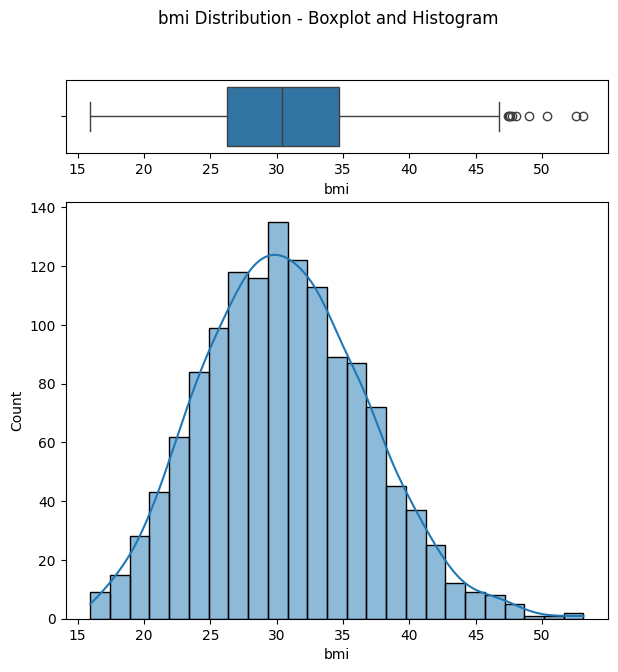

This is the range where a data point is not an outlier: from 13.67 to 47.32




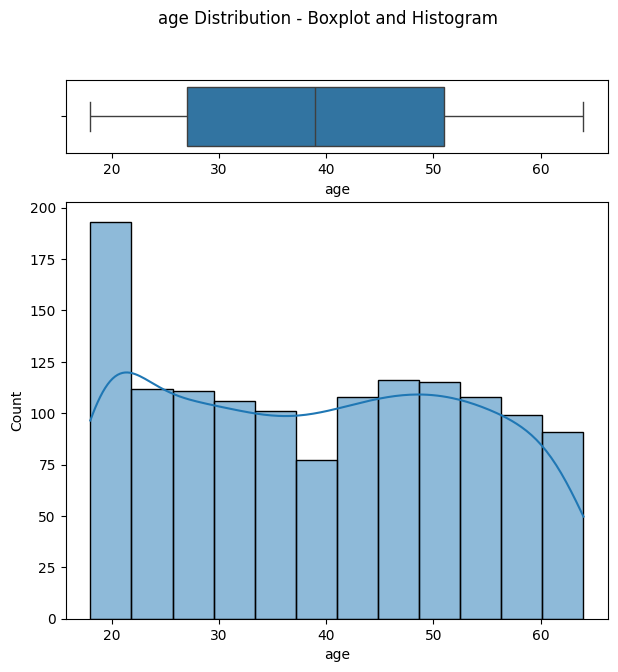

This is the range where a data point is not an outlier: from -9.0 to 87.0




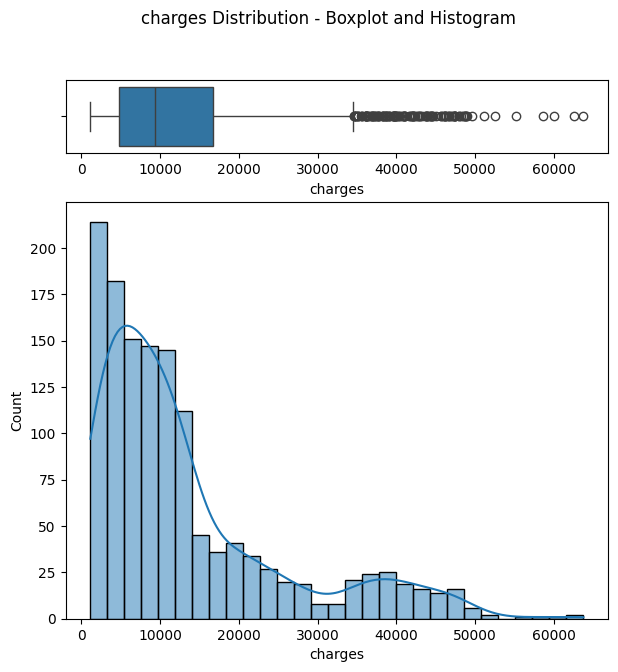

This is the range where a data point is not an outlier: from -13120.72 to 34524.78




In [40]:
def plot_histogram_and_boxplot(df_final):
    selected_cols = ['bmi', 'age','charges']
    
    for col in selected_cols:
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df_final, x=col, ax=axes[0])
        sns.histplot(data=df_final, x=col, kde=True, ax=axes[1])
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
        plt.show()

        # Only calculate IQR for numeric columns
        if pd.api.types.is_numeric_dtype(df_final[col]):
            Q1 = df_final[col].quantile(0.25)
            Q3 = df_final[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = (Q1 - 1.5 * IQR).round(2)
            upper = (Q3 + 1.5 * IQR).round(2)
            print(f"This is the range where a data point is not an outlier: from {lower} to {upper}")
            print("\n")
plot_histogram_and_boxplot(df_final)


Plot 2

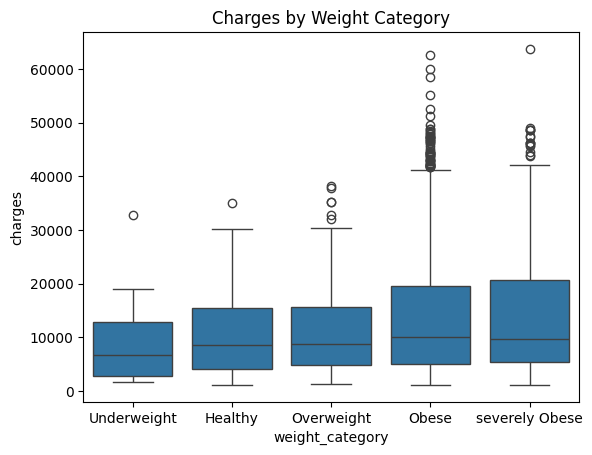

In [42]:
sns.boxplot(data=df_final, x='weight_category', y='charges')
plt.title('Charges by Weight Category')
plt.show()

spread of data (charges) increases as bmi increases with outliers also increasing up until obese weight category. Whilst this plot doesnt show correlations it does support the hypothesis that charges increase with bmi, but doesnt show to what extend. this will be explored futher on 

as the aim of the analysis is to consider how each variable affects charges i want to get a more general overview of the data. the outliers will skew this as make charges seem higher than they are so a threshold will be set and the outlier over this removed. note this means not all outliers will be removed but means data will be more normalised.

**Applying a Log Transformer**

In [48]:
from sklearn.pipeline import Pipeline
from feature_engine.imputation import DropMissingData
import feature_engine.transformation as vt

In [51]:
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('log', vt.LogTransformer(variables=['charges','bmi']))
])
df_cleaned = pipeline.fit_transform(df_final)
df_cleaned.head()   

,age,sex,bmi,weight_category,children,smoker,region,charges,sex_male,smoker_yes,region_encoded
0,19.0,female,3.328627,Overweight,0.0,yes,southwest,9.734176,0.0,1.0,3.0
1,18.0,male,3.519573,Obese,1.0,no,southeast,7.453302,1.0,0.0,2.0
2,28.0,male,3.496508,Obese,3.0,no,southeast,8.400538,1.0,0.0,2.0
3,33.0,male,3.122585,Healthy,0.0,no,northwest,9.998092,1.0,0.0,1.0
4,32.0,male,3.363149,Overweight,0.0,no,northwest,8.260197,1.0,0.0,1.0


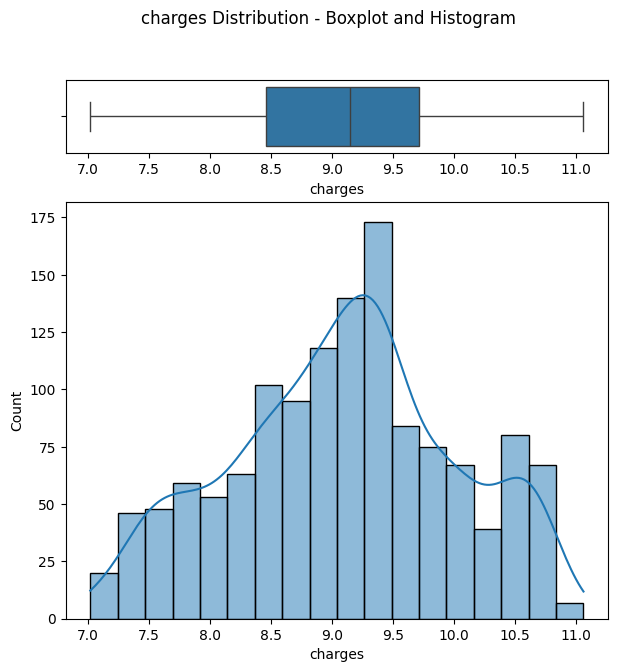

This is the range where a data point is not an outlier: from 6.59 to 11.6




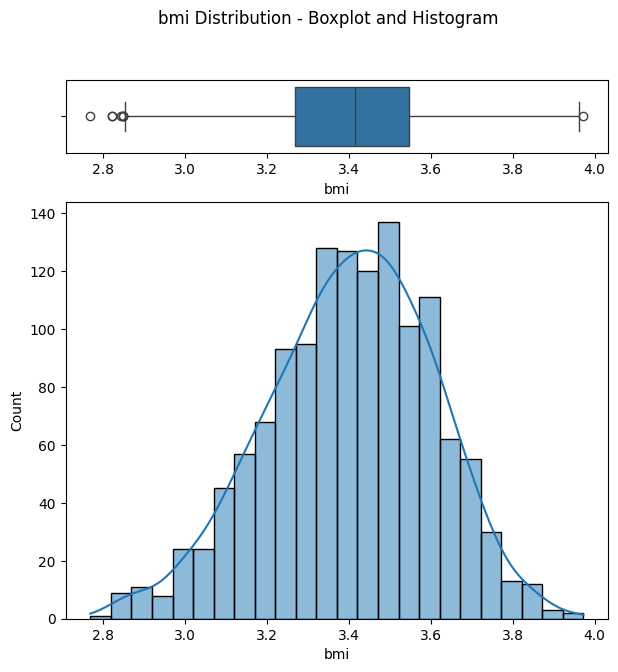

This is the range where a data point is not an outlier: from 2.85 to 3.96




In [52]:
def plot_histogram_and_boxplot(df_cleaned):
    selected_cols = ['charges','bmi']
    
    for col in selected_cols:
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df_cleaned, x=col, ax=axes[0])
        sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[1])
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
        plt.show()

        # Only calculate IQR for numeric columns
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = (Q1 - 1.5 * IQR).round(2)
            upper = (Q3 + 1.5 * IQR).round(2)
            print(f"This is the range where a data point is not an outlier: from {lower} to {upper}")
            print("\n")
plot_histogram_and_boxplot(df_cleaned)

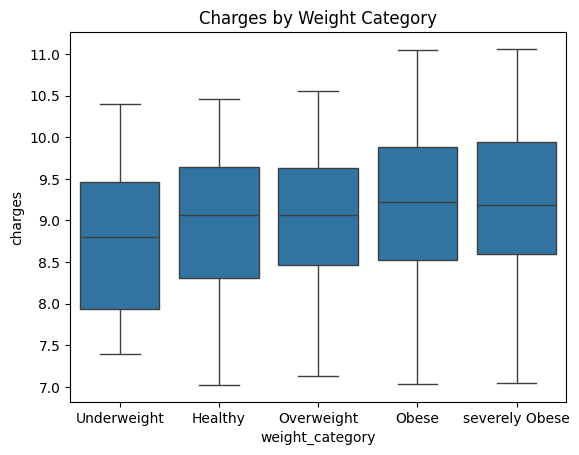

In [53]:
sns.boxplot(data=df_cleaned, x='weight_category', y='charges')
plt.title('Charges by Weight Category')
plt.show()

**Saving Cleaned Dataset**

In [56]:
# Create directory if it doesn't exist
#os.makedirs('./Data/cleaned_data', exist_ok=True)

# Save cleaned dataset
df_cleaned.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved successfully to './medical_insurance_data_analysis/cleaned_data/insurance_cleaned.csv'")

Cleaned dataset saved successfully to './medical_insurance_data_analysis/cleaned_data/insurance_cleaned.csv'


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---